In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv converts to DataFrame
applied = pd.read_csv('../Data/assylum/assylum_applications_raw.csv')
accepted = pd.read_csv('../Data/assylum/assylum_applications_accepted_raw.csv')

In [68]:
applied.rename(columns={'OBS_VALUE': 'count_applied'}, errors='raise', inplace = True)
accepted.rename(columns={'OBS_VALUE' : 'count_accepted'}, inplace = True)

398 397
Countries to choose from: {'Portugal', 'Czechia', 'Finland', 'Hungary', 'Romania', 'Greece', 'Spain', 'Montenegro', 'Ireland', 'Bulgaria', 'Italy', 'Lithuania', 'Denmark', 'Liechtenstein', 'European Union - 27 countries (from 2020)', 'Latvia', 'Germany', 'Slovenia', 'Estonia', 'Croatia', 'Norway', 'Luxembourg', 'Cyprus', 'France', 'Austria', 'Slovakia', 'Netherlands', 'Belgium', 'Poland', 'Switzerland', 'Malta', 'Iceland', 'Sweden', 'United Kingdom'}


,count_applied,count_accepted,year
country,,,
European Union - 27 countries (from 2020),8717385,262465,22198
Germany,3281775,121380,24222
France,1374205,82375,24222
Italy,989580,6320,24222
Spain,849430,295,24222
Greece,529055,7330,24222
Sweden,504455,10485,24222
Austria,478265,30640,24222
Belgium,328105,5090,24222


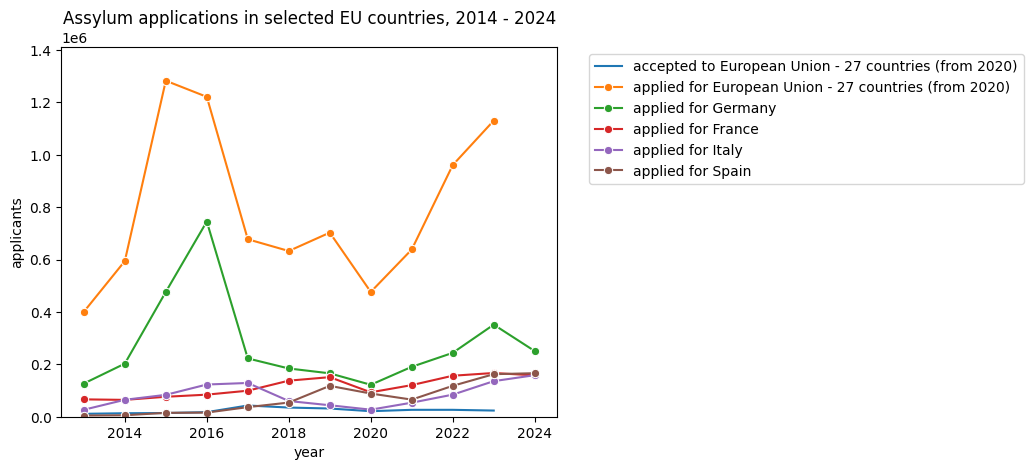

In [167]:

print(len(applied), len(accepted))
# applied is longer by one row, so we need to merge both dataframes
joined = pd.merge(applied, accepted, on = ['TIME_PERIOD', 'geo',], how = 'inner')

# we only need a few of the columns:
assylum_table = pd.DataFrame({'count_applied' : joined['count_applied'], 
                              'count_accepted' : joined['count_accepted'],
                              'country': joined['geo'], 
                              'year': joined['TIME_PERIOD'] })

# display(assylum_table)
# display(accepted)
# display(applied)

def draw_asyllum(name, applied = True, accepted=False):
    a_country = assylum_table.query("country == @name").set_index('year')

    if applied:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_applied', label = f'applied for {name}', marker= 'o')
    if accepted:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_accepted', label = f'accepted to {name}')

    a.set_title(f'Assylum applications in selected EU countries, 2014 - 2024')
    if applied:
        upper_y = 1.1 * assylum_table['count_applied'].max()
    else:
        upper_y = 1.1 * assylum_table['count_accepted'].max()

    a.set_ylim(ymin= 0, ymax = upper_y )
    a.set_ylabel('applicants')
    a.legend(bbox_to_anchor=(1.05, 1), loc=2)

print('Countries to choose from:', set(assylum_table['country']))


# Plot the top 5 countries with the most applications:
top = assylum_table.groupby(by = 'country').sum().sort_values(by = 'count_applied', ascending=False)
display(top)
g = draw_asyllum(top.index[0], applied = False, accepted=True)
for country in top.index[0:5]:
    g = draw_asyllum(country)

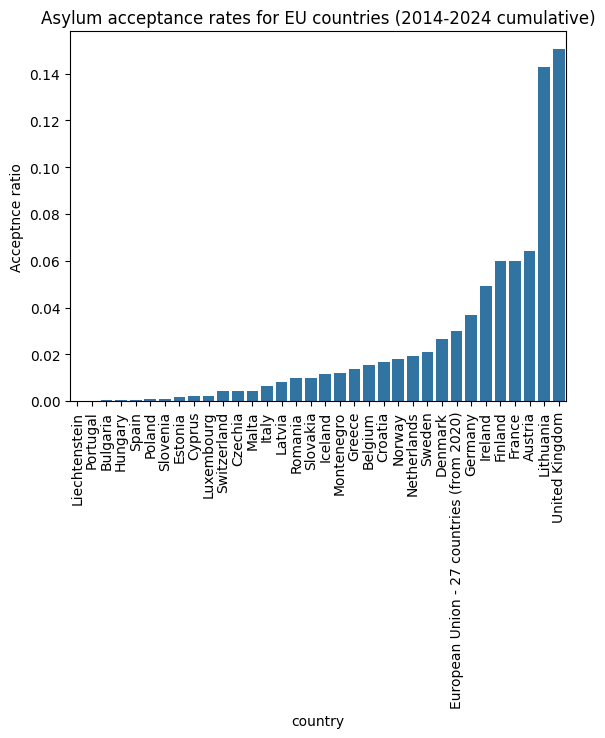

In [165]:

# which country is the most generous?
# -> compute ratios of acceptance for each country and plot as bar plot
top['b_ratio'] = top['count_accepted'] / top['count_applied']
top.sort_values(by = 'b_ratio', inplace = True)
a = sns.barplot(data = top, x = 'country', y = 'b_ratio')
a.set_ylabel('Acceptnce ratio')
a.set_title('Asylum acceptance rates for EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
pass